# Data cleaning - FBI dataset

This notebook shows all the data cleaning steps. It has to be run once to obtain the cleaned data.

## Imports

In [1]:
import sys
import os
import re
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
# Add the project root directory (not src) to sys.path
sys.path.append(os.path.abspath("../data/"))

# Now import the DataLoader class
from data_loading import DataLoader

raw = '../../data/RAW/'
clean = '../../data/CLEAN'

## FBI NIBRS

Washington data was already merged in `Data_Merging_by_States_Year.ipynb` in order to have all reported incidents from all available years in the state of Washington.

To have better results, we would need to use and clean the data of each states.

In [ ]:
# Load the washington data
WA_data_example = pd.read_csv(raw+"/Washington/Washington_merged_data.csv", index_col=0)
WA_data_example

,incident_date,offense_type_id,arrestee_id,weapon_id,victim_id,injury_id,circumstances_id,year
incident_id,,,,,,,,
89222817,10-JUL-16,27,NaN,NaN,97453189,3.0,6.0,2016
89222827,10-AUG-16,21,NaN,NaN,97453202,NaN,NaN,2016
89222824,02-JUL-16,32,25962728.0,1.0,97453196,NaN,1.0,2016
89222840,28-NOV-16,45,25962737.0,1.0,97453219,NaN,NaN,2016
89222840,28-NOV-16,45,25962735.0,1.0,97453219,NaN,NaN,2016
...,...,...,...,...,...,...,...,...
47084911,2008-12-21 00:00:00,49,NaN,NaN,50924594,NaN,NaN,2008
47084912,2008-12-28 00:00:00,35,12637007.0,1.0,50924595,NaN,NaN,2008
47084913,2008-12-01 00:00:00,11,12637008.0,1.0,50924597,NaN,NaN,2008


In order to clean the data, we will use data that gives `offense_type`. To do so, we have to iterate through the years to get all offense types. We save the results in `offense_data`

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys
import importlib

sys.path.append(os.path.abspath("../data/"))

import FBI_merging

importlib.reload(FBI_merging)

from FBI_merging import merge_offense_types


offense_data = merge_offense_types('../../data/RAW/Washington', 'WA')

Loaded offense type data from: ../../data/RAW/Washington/WA-2016/nibrs_offense_type.csv
Loaded offense type data from: ../../data/RAW/Washington/WA-2011/nibrs_offense_type.csv
Loaded offense type data from: ../../data/RAW/Washington/WA-2018/nibrs_offense_type.csv
Loaded offense type data from: ../../data/RAW/Washington/WA-2020/nibrs_offense_type.csv
Loaded offense type data from: ../../data/RAW/Washington/WA-2019/nibrs_offense_type.csv
Loaded offense type data from: ../../data/RAW/Washington/WA-2010/nibrs_offense_type.csv
Loaded offense type data from: ../../data/RAW/Washington/WA-2017/nibrs_offense_type.csv
Loaded offense type data from: ../../data/RAW/Washington/WA-2005/nibrs_offense_type.csv
Loaded offense type data from: ../../data/RAW/Washington/WA-2012/nibrs_offense_type.csv
Loaded offense type data from: ../../data/RAW/Washington/WA-2015/nibrs_offense_type.csv
Loaded offense type data from: ../../data/RAW/Washington/WA-2014/nibrs_offense_type.csv
Loaded offense type data from: .

To clean a state data (in our example Washington), we have to keep only violent incidents. As a proof of concept, we will only focus on 2 parameters used in `offense_data`:
-  crime against a `Person`
-  violent categories found in `offense_category_name`

In [9]:
# Visualize offense_data
offense_data

,offense_type_id,offense_code,offense_name,crime_against,ct_flag,hc_flag,hc_code,offense_category_name,offense_group
0,58,23*,Not Specified,Property,N,Y,6.0,Larceny/Theft Offenses,A
1,1,09C,Justifiable Homicide,Person,N,N,NaN,Homicide Offenses,A
2,2,26A,False Pretenses/Swindle/Confidence Game,Property,Y,Y,NaN,Fraud Offenses,A
3,3,36B,Statutory Rape,Person,N,Y,NaN,Sex Offenses,A
4,4,11C,Sexual Assault With An Object,Person,N,Y,2.0,Sex Offenses,A
...,...,...,...,...,...,...,...,...,...
1085,60,64B,"Human Trafficking, Involuntary Servitude",Person,N,Y,NaN,Human Trafficking,NaN
1086,61,40C,Purchasing Prostitution,Society,N,Y,NaN,Prostitution Offenses,NaN
1087,63,26F,Identity Theft,Property,N,Y,NaN,Fraud Offenses,NaN
1088,64,26G,Hacking/Computer Invasion,Property,N,Y,NaN,Fraud Offenses,NaN


In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys

sys.path.append(os.path.abspath("../data/"))

from FBI_cleaning import filter_violent_offenses

# Example of violent categories and targets used in filter_violent_offenses
# violent_categories = [
#         "Assault Offenses", "Homicide Offenses", "Sex Offenses", "Kidnapping/Abduction", "Animal Cruelty"]
#     violent_targets = ["Person"]  # Offenses against a person

# Clean the data by filtering out non-violent offenses
WA_cleaned_data = filter_violent_offenses(WA_data_example, offense_data)

# Save the cleaned data
state_clean_dir = '../../data/CLEAN/'
output_file = os.path.join(state_clean_dir, 'Washington_cleaned_data.csv')

WA_cleaned_data.to_csv(output_file, index=False)

Identified 288 violent offense types.
Dropped 4382917 non-violent rows. Remaining rows: 861479


In [12]:
WA_cleaned_data

,incident_date,offense_type_id,arrestee_id,weapon_id,victim_id,injury_id,circumstances_id,year
incident_id,,,,,,,,
89222817,10-JUL-16,27,NaN,NaN,97453189,3.0,6.0,2016
89222824,02-JUL-16,32,25962728.0,1.0,97453196,NaN,1.0,2016
88680735,13-DEC-16,27,25768014.0,1.0,96830515,4.0,NaN,2016
88680735,13-DEC-16,27,25768014.0,1.0,96830512,4.0,2.0,2016
88680735,13-DEC-16,27,25768014.0,1.0,96830512,1.0,2.0,2016
...,...,...,...,...,...,...,...,...
47084228,2008-12-10 00:00:00,27,12636919.0,1.0,50922935,1.0,1.0,2008
47084901,2008-12-07 00:00:00,51,NaN,NaN,50923874,4.0,NaN,2008
47084904,2008-12-09 00:00:00,51,12637003.0,1.0,50923877,4.0,NaN,2008


#### Before data cleaning

/Users/lucie/ADA MA1/ada-2024-project-alligatorsdontapologize24/src/plots_helper/FBI_analysis.py:119: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[date_column] = pd.to_datetime(data[date_column], errors='coerce')


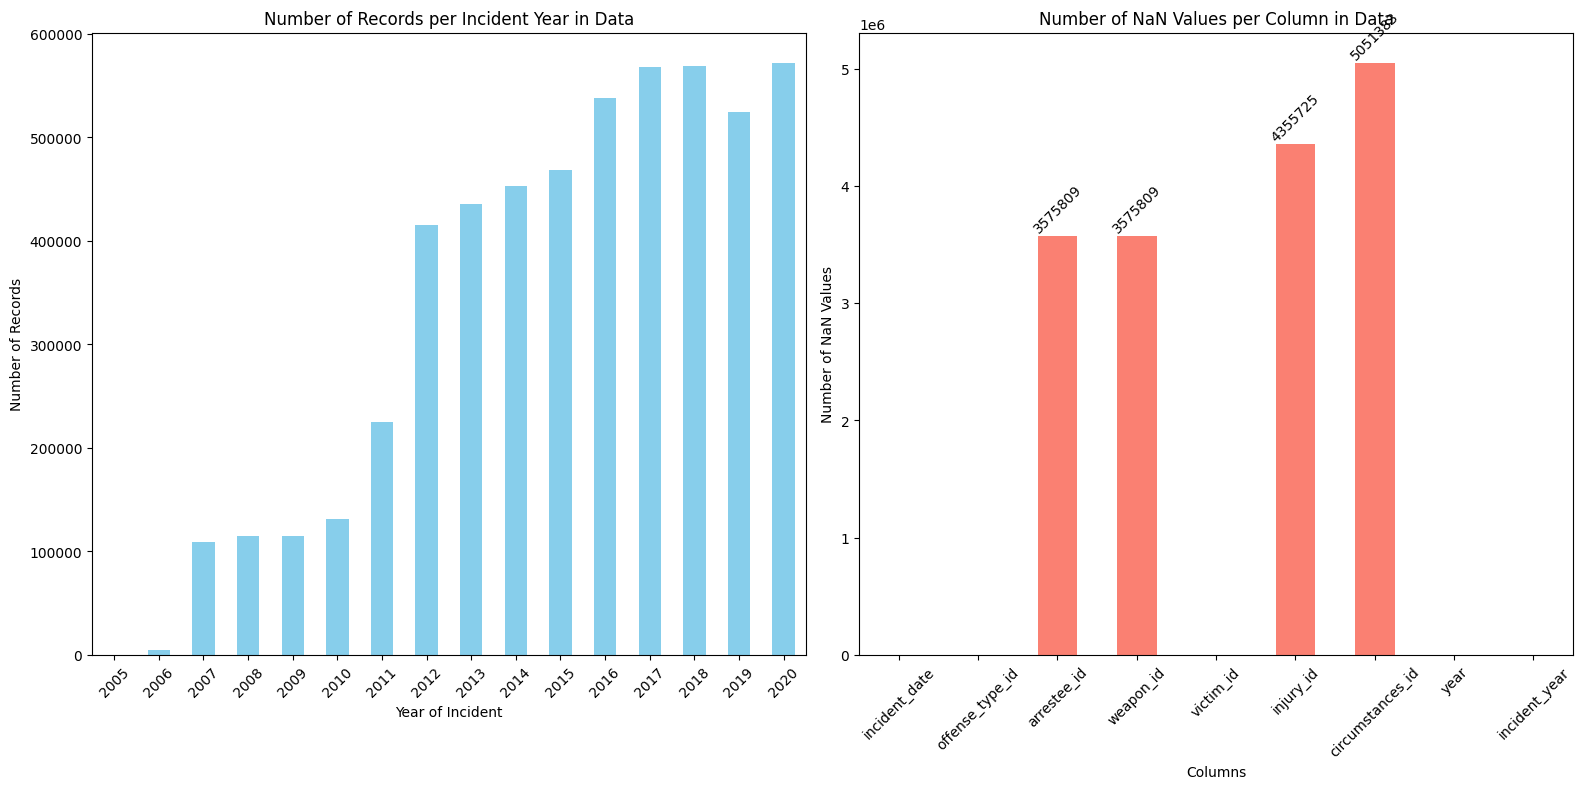

In [18]:
import os
import pandas as pd
import sys
import importlib

sys.path.append(os.path.abspath("../plots_helper/"))

import FBI_analysis

importlib.reload(FBI_analysis)

from FBI_analysis import analyze_incidents_and_missing_values

# Analyze and visualize the incidents and missing values per column
analyze_incidents_and_missing_values(WA_data_example, 'incident_date', verbose=False)

#### After data cleaning

/Users/lucie/ADA MA1/ada-2024-project-alligatorsdontapologize24/src/plots_helper/FBI_analysis.py:119: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[date_column] = pd.to_datetime(data[date_column], errors='coerce')
/Users/lucie/ADA MA1/ada-2024-project-alligatorsdontapologize24/src/plots_helper/FBI_analysis.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[date_column] = pd.to_datetime(data[date_column], errors='coerce')
/Users/lucie/ADA MA1/ada-2024-project-alligatorsdontapologize24/src/plots_helper/FBI_analysis.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

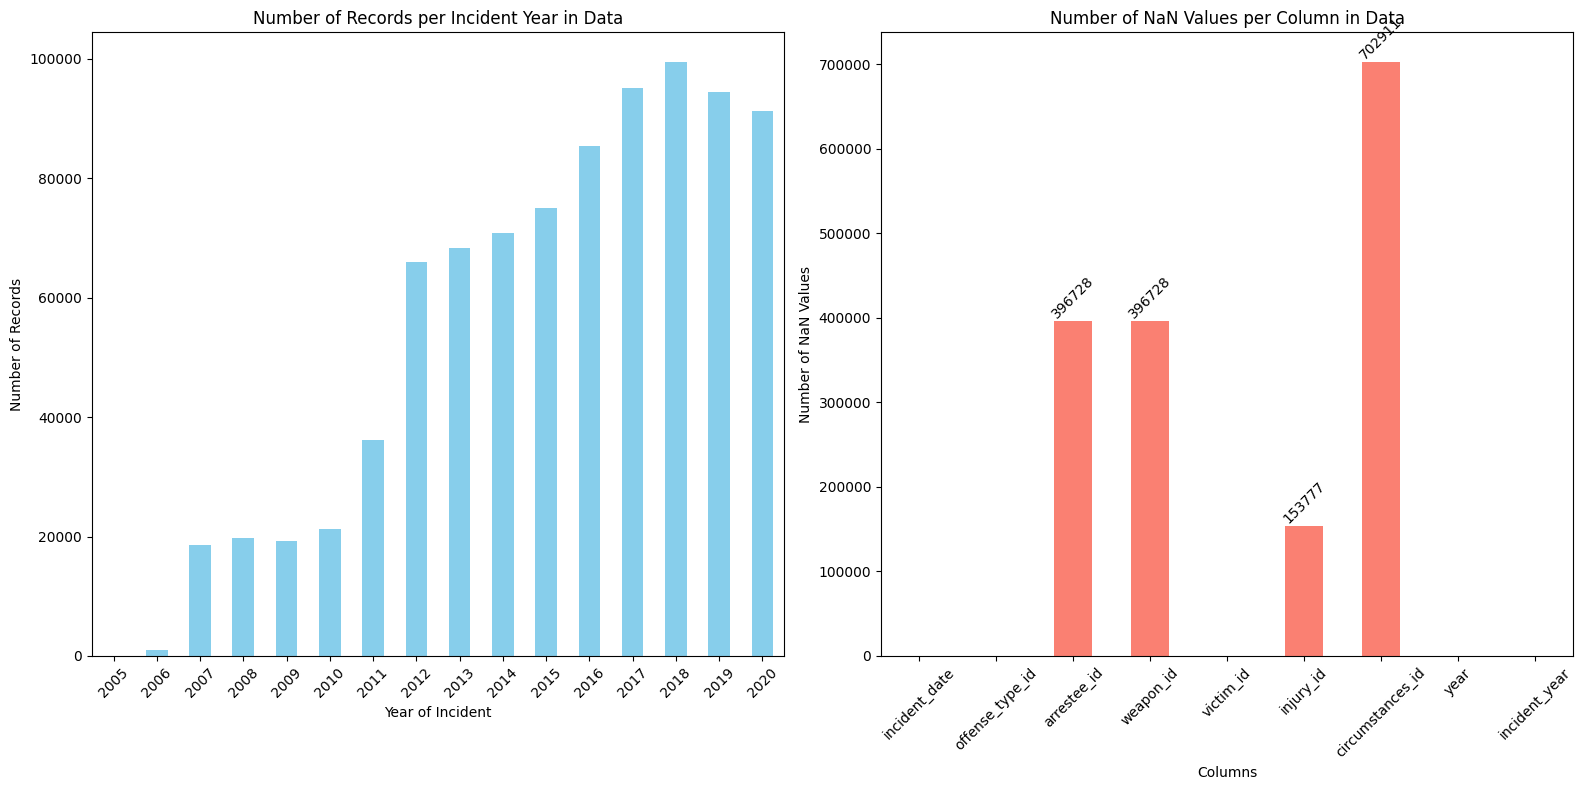

In [19]:
import os
import pandas as pd
import sys
import importlib

sys.path.append(os.path.abspath("../plots_helper/"))

import FBI_analysis

importlib.reload(FBI_analysis)

from FBI_analysis import analyze_incidents_and_missing_values

# Analyze and visualize the incidents and missing values per column
analyze_incidents_and_missing_values(WA_cleaned_data, 'incident_date', verbose=False)

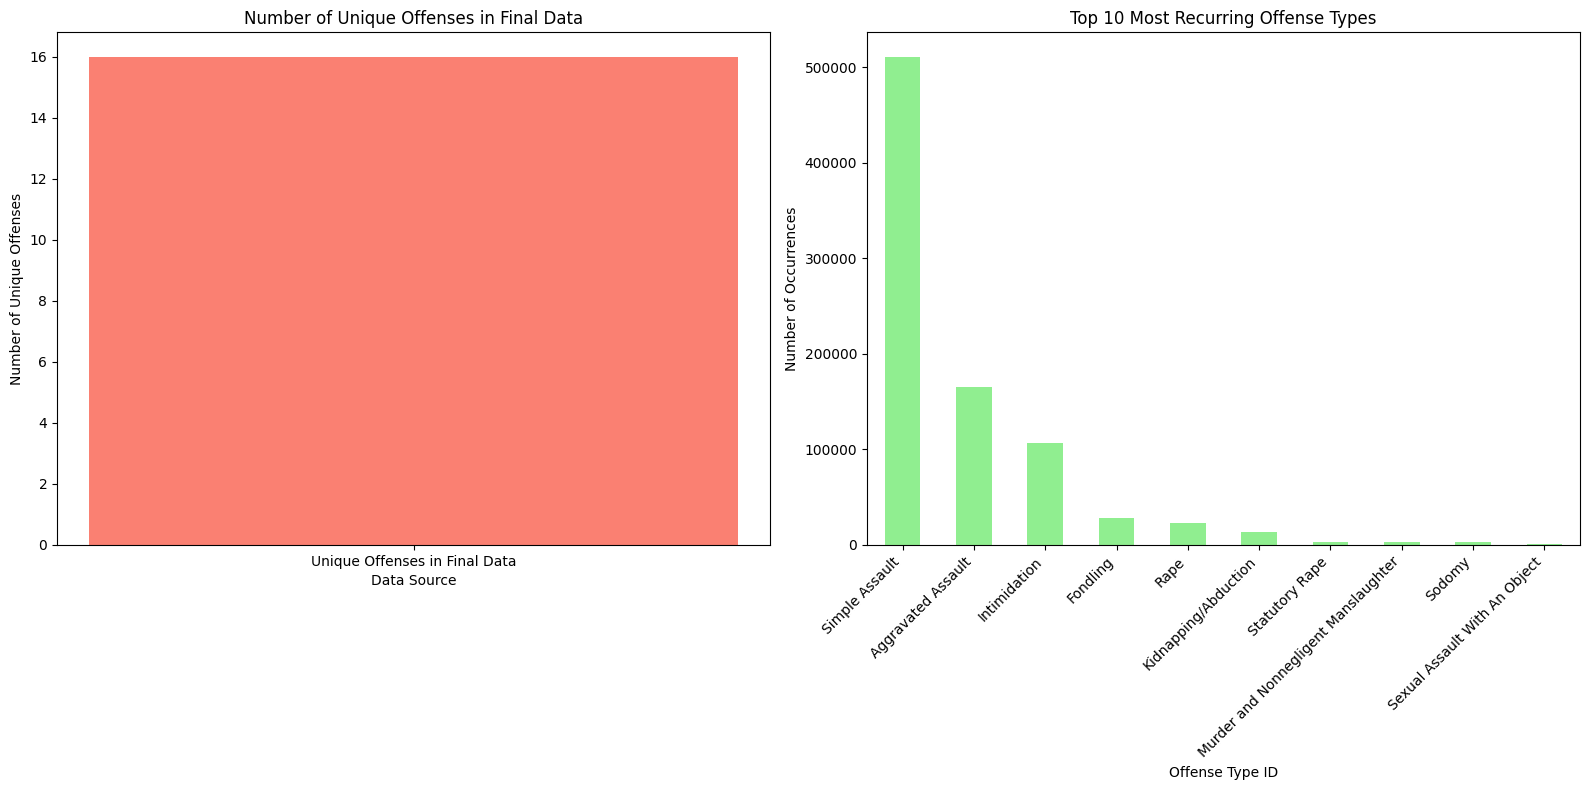

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys

sys.path.append(os.path.abspath("../plots_helper/"))

from FBI_analysis import analyze_offenses

# Define the base directory where Alabama data is stored
base_dir = '../../data/RAW/Washington'
state_prefix = 'WA'

# Analyze and visualize the offenses
analyze_offenses(WA_cleaned_data, base_dir, state_prefix, verbose=False)

The first plot shows that the majority of incidents fall into well-defined and recurring offense categories. It will help us to categorize incidents reliably based on these established classifications

The second plot shows that the top 10 most reccurent violent offense.